In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)

'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'lxml.etree._Element' object has no attribute 'text_content'
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte

'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'lxml.etree._Element' object has no attribute 'text_content'
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec ca

In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN
0,cc291c4e68ac16cdef2b1a424f29ef20,Co-Intelligence\nBy Ethan Mollick\nBy Ethan Mo...,2802
1,5496017492babc1c86e79e4087a514b7,Health technology company HealthEC has disclos...,2383
2,af78a81f5060b724cc93f8f9a3741a9f,For one rioter at the US Capitol on 6 January ...,6636
3,86001e4fb7b55397aece664afd67001a,Millennials (born in the 1980s and mid-1990s) ...,13362
4,f562dc25478d3218121f1e738c2013a9,Vespa 150 TAP\n|Manufacturer||Ateliers de Cons...,3216
5,0b7c76362a1e20b1faa1a422d73b5b0d,"The probabilities, if true, are chilling.\nSmi...",2984
6,863bf5f38e20da4709e5cc0951a350c6,Cognitive Mimetics and Human Digital Twins : T...,3285
7,71cbf82b85b58a6675d05308f8e1759e,A review of Kate Soper’s book ‘Post-Growth Liv...,9669
8,1eabce42f0f6a8a399a0db3e2591c302,Packets of heroin and a drone confiscated by I...,5263
9,860579742aa1ee0b528d16ec24f2ff83,Pharmacy chain Rite Aid has been denied the ri...,5441


In [10]:
len(NEW),len(D)

(25, 1654)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,cc291c4e68ac16cdef2b1a424f29ef20,Co-Intelligence\nBy Ethan Mollick\nBy Ethan Mo...,2802
1,5496017492babc1c86e79e4087a514b7,Health technology company HealthEC has disclos...,2383
2,af78a81f5060b724cc93f8f9a3741a9f,For one rioter at the US Capitol on 6 January ...,6636
3,86001e4fb7b55397aece664afd67001a,Millennials (born in the 1980s and mid-1990s) ...,13362
4,f562dc25478d3218121f1e738c2013a9,Vespa 150 TAP\n|Manufacturer||Ateliers de Cons...,3216
...,...,...,...
1674,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1675,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1676,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1677,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [14]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,cc291c4e68ac16cdef2b1a424f29ef20,Co-Intelligence\nBy Ethan Mollick\nBy Ethan Mo...,2802
1,5496017492babc1c86e79e4087a514b7,Health technology company HealthEC has disclos...,2383
2,af78a81f5060b724cc93f8f9a3741a9f,For one rioter at the US Capitol on 6 January ...,6636
3,86001e4fb7b55397aece664afd67001a,Millennials (born in the 1980s and mid-1990s) ...,13362
4,f562dc25478d3218121f1e738c2013a9,Vespa 150 TAP\n|Manufacturer||Ateliers de Cons...,3216
...,...,...,...
1674,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1675,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1676,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1677,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [15]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
0,cc291c4e68ac16cdef2b1a424f29ef20,Co-Intelligence\nBy Ethan Mollick\nBy Ethan Mo...,2802
1,5496017492babc1c86e79e4087a514b7,Health technology company HealthEC has disclos...,2383
2,af78a81f5060b724cc93f8f9a3741a9f,For one rioter at the US Capitol on 6 January ...,6636
3,86001e4fb7b55397aece664afd67001a,Millennials (born in the 1980s and mid-1990s) ...,13362
4,f562dc25478d3218121f1e738c2013a9,Vespa 150 TAP\n|Manufacturer||Ateliers de Cons...,3216
...,...,...,...
1673,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1674,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1675,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1676,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [16]:
df.describe()

,LEN
count,1344.000000
mean,11548.031994
std,20001.097076
min,1505.000000
25%,3776.750000
50%,6822.000000
75%,12896.250000
max,496896.000000


In [17]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

(1344, 1101618)

In [18]:
X_train_counts[0]

<1x1101618 sparse matrix of type '<class 'numpy.float64'>'
	with 426 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [20]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

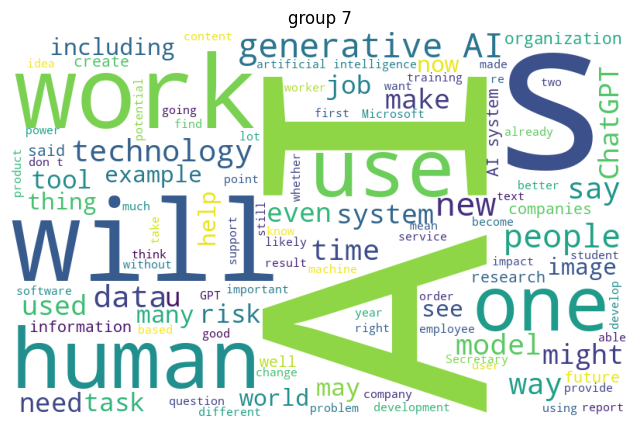

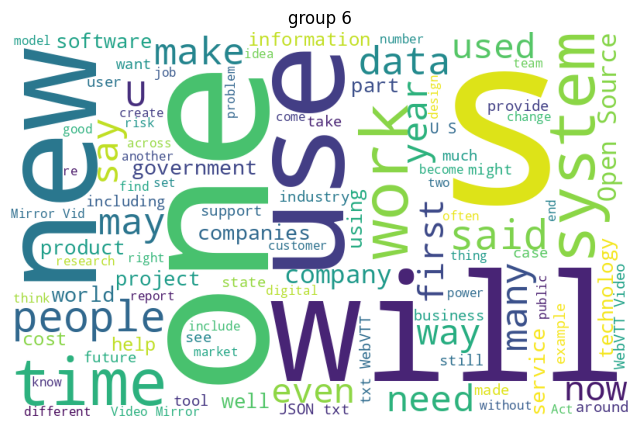

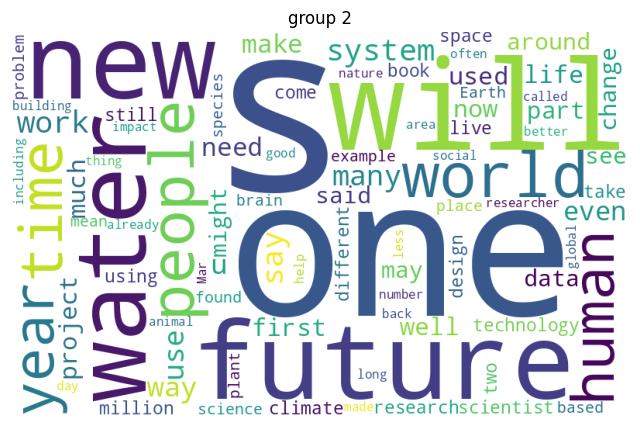

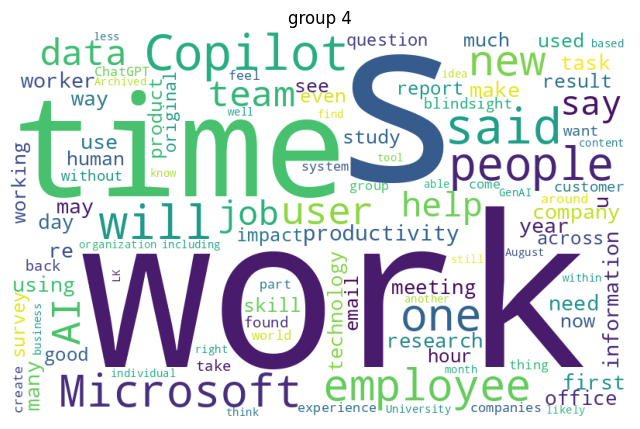

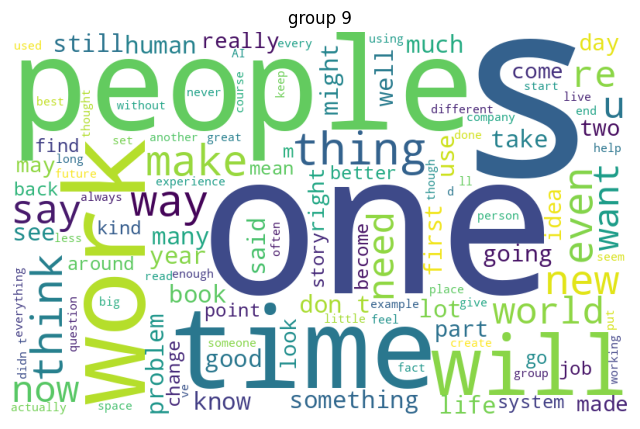

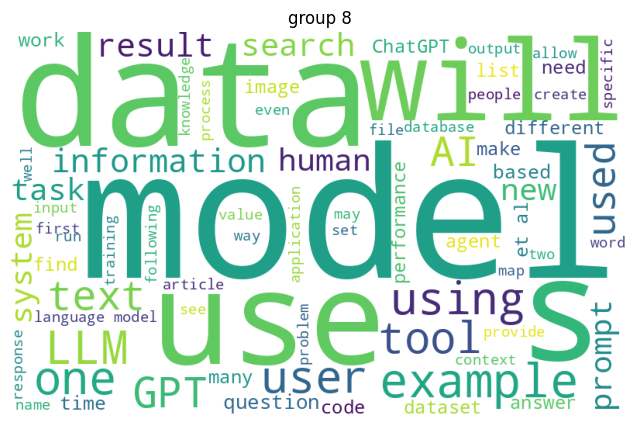

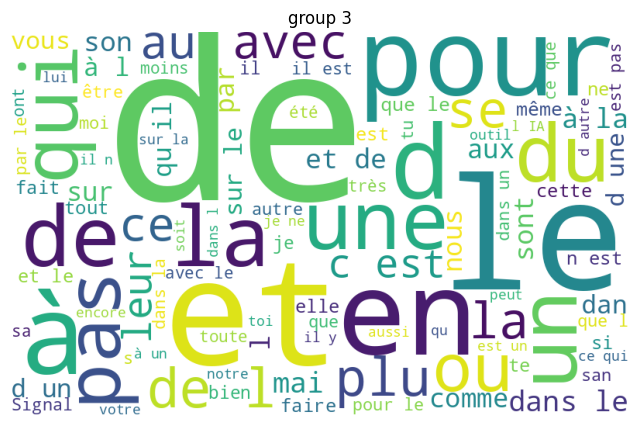

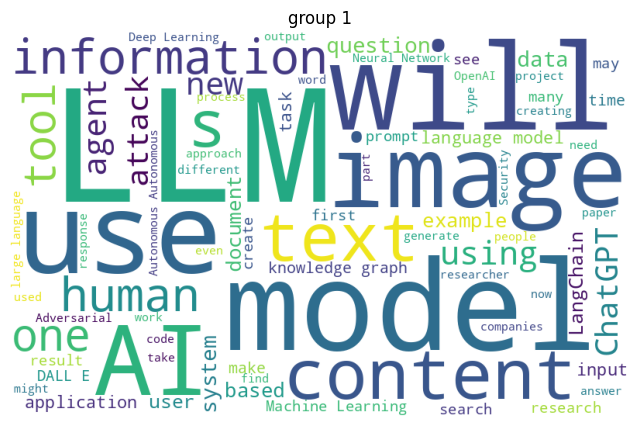

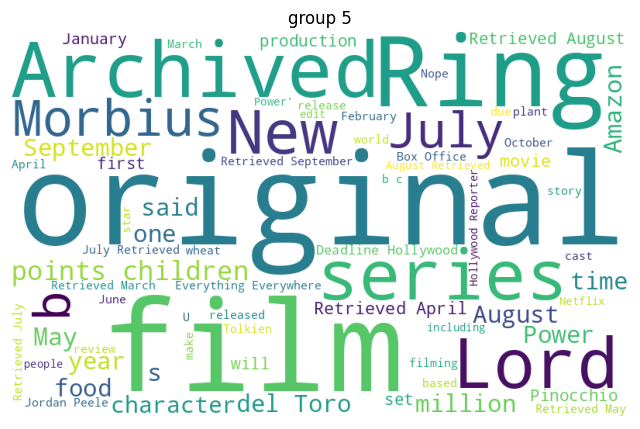

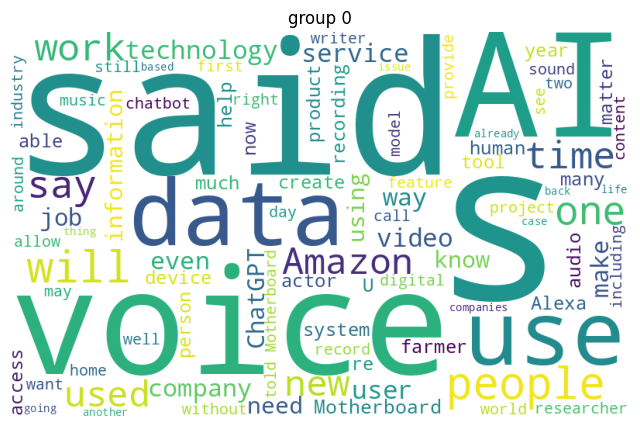

In [21]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [22]:
# new_df includes the category for errord ones as well.

# No context is given, so the group name is default to the group number.

# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [23]:
new_df

,text,labels
0,Co-Intelligence\nBy Ethan Mollick\nBy Ethan Mo...,7
1,Health technology company HealthEC has disclos...,6
2,For one rioter at the US Capitol on 6 January ...,6
3,Millennials (born in the 1980s and mid-1990s) ...,2
4,Vespa 150 TAP\n|Manufacturer||Ateliers de Cons...,6
...,...,...
1673,China’s growing number of insomniacs are turni...,0
1674,I would say my efficiency is up ~20% since sta...,4
1675,The U.S. government has restricted sales of Nv...,6
1676,My kids and I just played D&D with ChatGPT4 as...,6
